In [9]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import OptimizeResult
import matplotlib.pyplot as plt

%matplotlib inline

**Задание**

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.


In [21]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result.nit
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [68]:
mut = np.arange(0.1, 0.8, 0.1)
pops = np.arange(5, 10, 1)

In [163]:
nit_dict = {'best1bin': [], 'best1exp': [], 'rand1exp': [], 'randtobest1exp': [], 'currenttobest1exp': [], 'best2exp': [], 'rand2exp': [], 'randtobest1bin': [], 'currenttobest1bin': [], 'best2bin': [], 'rand2bin': [], 'rand1bin': []}
for i in nit_dict.keys():
    for x in mut:
        for n in pops:
            result = differential_evolution(ackley, bounds, strategy=i, popsize=n, mutation=x, seed=42)
            nit_dict[i].append([x, n, result.nit])
nit_dict

{'best1bin': [[0.1, 5, 5],
  [0.1, 6, 7],
  [0.1, 7, 4],
  [0.1, 8, 15],
  [0.1, 9, 16],
  [0.2, 5, 9],
  [0.2, 6, 8],
  [0.2, 7, 11],
  [0.2, 8, 6],
  [0.2, 9, 31],
  [0.30000000000000004, 5, 26],
  [0.30000000000000004, 6, 35],
  [0.30000000000000004, 7, 45],
  [0.30000000000000004, 8, 43],
  [0.30000000000000004, 9, 42],
  [0.4, 5, 59],
  [0.4, 6, 57],
  [0.4, 7, 48],
  [0.4, 8, 8],
  [0.4, 9, 51],
  [0.5, 5, 12],
  [0.5, 6, 61],
  [0.5, 7, 61],
  [0.5, 8, 62],
  [0.5, 9, 59],
  [0.6, 5, 25],
  [0.6, 6, 75],
  [0.6, 7, 78],
  [0.6, 8, 77],
  [0.6, 9, 75],
  [0.7000000000000001, 5, 96],
  [0.7000000000000001, 6, 92],
  [0.7000000000000001, 7, 93],
  [0.7000000000000001, 8, 93],
  [0.7000000000000001, 9, 95]],
 'best1exp': [[0.1, 5, 11],
  [0.1, 6, 14],
  [0.1, 7, 8],
  [0.1, 8, 8],
  [0.1, 9, 17],
  [0.2, 5, 10],
  [0.2, 6, 10],
  [0.2, 7, 31],
  [0.2, 8, 31],
  [0.2, 9, 52],
  [0.30000000000000004, 5, 89],
  [0.30000000000000004, 6, 73],
  [0.30000000000000004, 7, 69],
  [0.30000000

Судя по данным лучше всего себя показала стратегия best1bin. По ней и будем строить график.

Разобьем получившиеся данные в отдельные спсики по стратегиям




In [170]:
best1bin  = []
best1exp = []
rand1exp = []
randtobest1exp = []
currenttobest1exp = []
best2exp = []
rand2exp = []
randtobest1bin = []
currenttobest1bin = []
best2bin = []
rand2bin = []
rand1bin = []
for key, values in nit_dict.items():
    if key == 'best1bin':
        best1bin.append(values)
    if key == 'best1exp':
        best1exp.append(values)
    if key == 'rand1exp':
        rand1exp.append(values)
    if key == 'randtobest1exp':
        randtobest1exp.append(values)
    if key == 'currenttobest1exp':
        currenttobest1exp.append(values)    
    if key == 'best2exp':
        best2exp.append(values)    
    if key == 'rand2exp':
        rand2exp.append(values)    
    if key == 'randtobest1bin':
        randtobest1bin.append(values)    
    if key == 'currenttobest1bin':
        currenttobest1bin.append(values)    
    if key == 'best2bin':
        best2bin.append(values) 
    if key == 'rand2bin':
        rand2bin.append(values)    
    if key == 'rand1bin':
        rand1bin.append(values)

выделим в отдельные списки значения по popsize, mutation и NIT

In [166]:
y_nit = []
pops_l = []
mut_l = []
for k in best1bin:
    for i in k:
        mut_l.append(i[0])
        pops_l.append(i[1])
        y_nit.append(i[2])

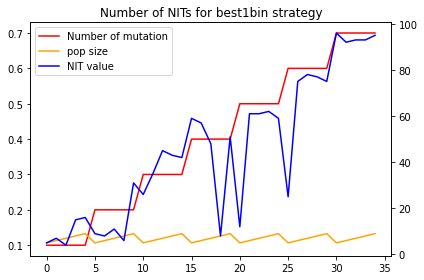

In [168]:
plt.rcParams["figure.autolayout"] = True


ax1 = plt.subplot()
l1, = ax1.plot(mut_l, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(pops_l, color='orange')
l3, = plt.plot(y_nit, color='blue')
plt.legend([l1, l2, l3], ["Number of mutation", "pop size", "NIT value"])
plt.title('Number of NITs for best1bin strategy')
plt.show()